In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [124]:
df = pd.read_csv("winequality-white.csv")

In [125]:
initial_rows, initial_cols = df.shape
updated_rows, updated_cols = df.shape

In [126]:
null_values_count = df.isnull().sum().sum()
if null_values_count > 0:
    print(f"{null_values_count} null values found in the dataset. Handling null values...")
    df.dropna(inplace=True)
    print("Null values have been removed.")

In [127]:
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print(f"{duplicates_count} duplicate rows found in the dataset. Handling duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

937 duplicate rows found in the dataset. Handling duplicates...
Duplicate rows have been removed.


In [128]:
print("\nDataset Information After Cleaning:")
print(df.info())

print("\nSummary Statistics After Cleaning:")
print(df.describe())

print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB
None

Summary Statistics After Cleaning:
       fixed acidity  volatile acidity  citric acid  

In [129]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Axes: >

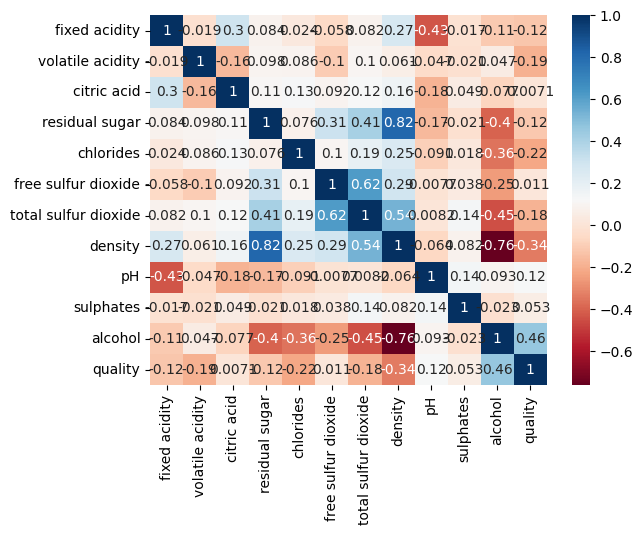

In [130]:
sns.heatmap(df.corr(), cmap='RdBu', annot = True)

In [148]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

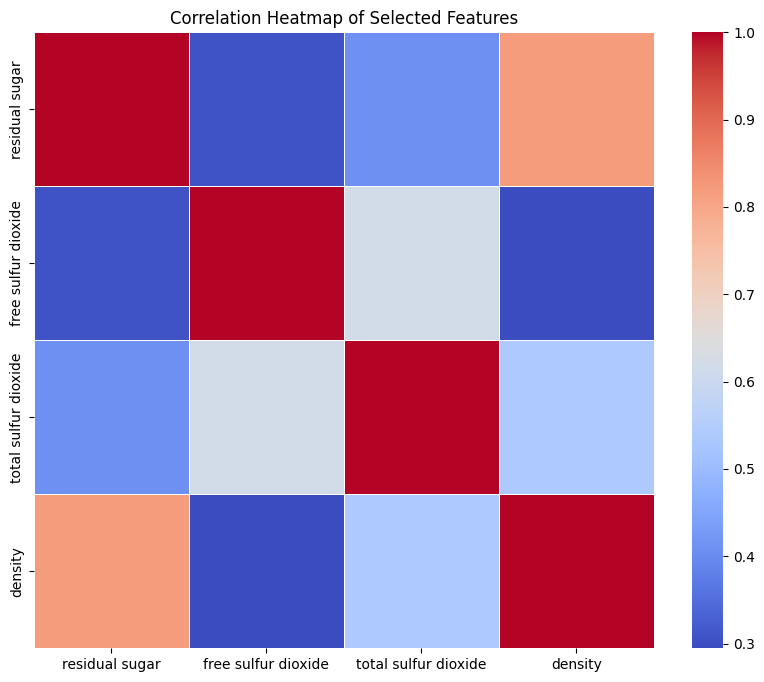

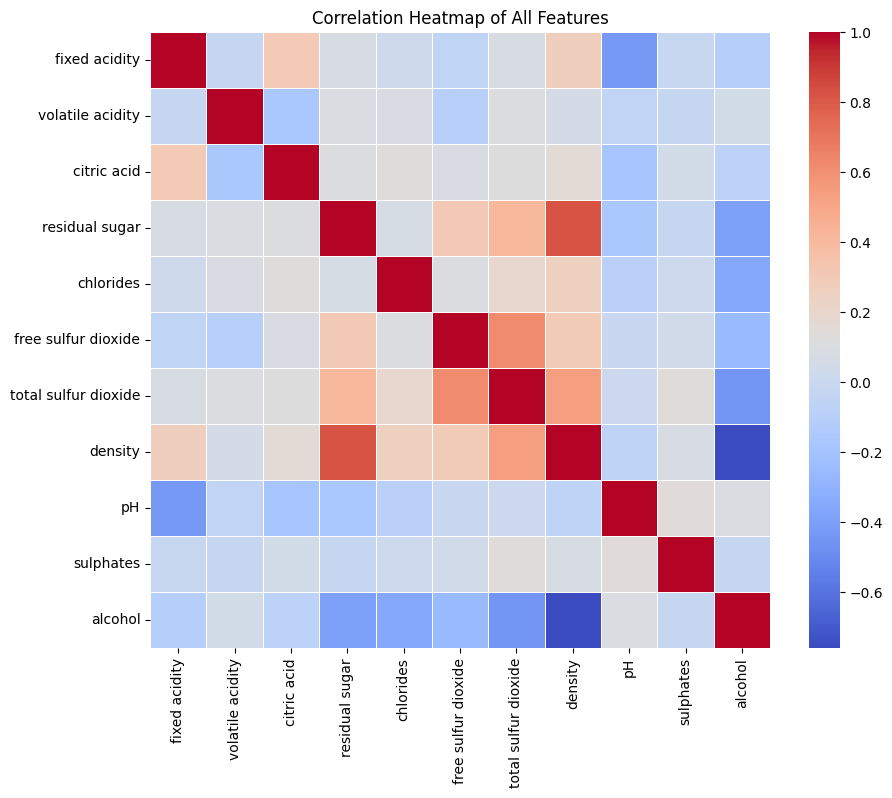

C:\Users\giore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', ]]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_selected = df[['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density']]

X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

correlation_matrix_selected = X_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

correlation_matrix_all = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

random_seed = 42

models = {
    "Logistic Regression": LogisticRegression(max_iter=30000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed),
    "Naive Bayes": GaussianNB()
}

results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

results_selected_features = {}
for name, model in models.items():
    model.fit(X_selected_train, y_train)
    predictions = model.predict(X_selected_test)
    accuracy = accuracy_score(y_test, predictions)
    results_selected_features[name] = accuracy

results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['Selected Features'] * len(models)
})


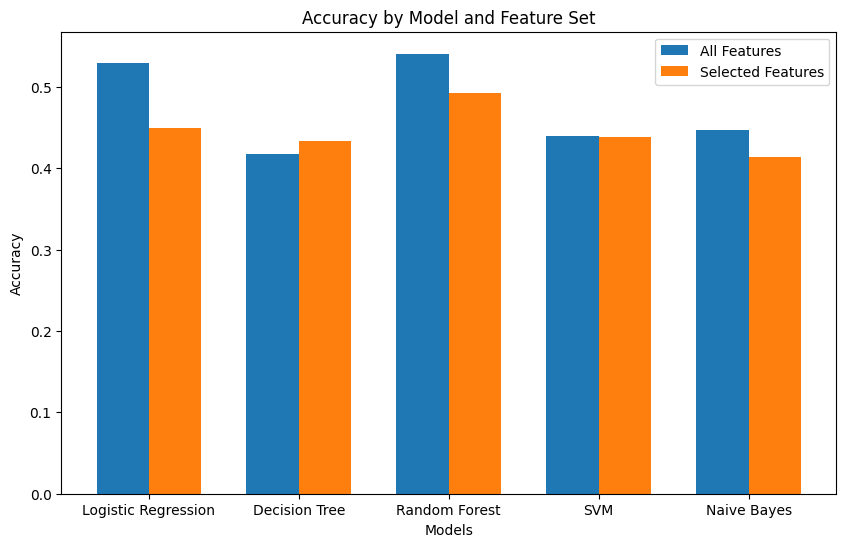

In [169]:
data = {
    'Logistic Regression': {'All Features': [list(results_all_features.values())[0]], 'Selected Features': [list(results_selected_features.values())[0]]},
    'Decision Tree': {'All Features': [list(results_all_features.values())[1]], 'Selected Features': [list(results_selected_features.values())[1]]},
    'Random Forest': {'All Features' :[list(results_all_features.values())[2]], 'Selected Features': [list(results_selected_features.values())[2]]},
    'SVM': {'All Features': [list(results_all_features.values())[3]], 'Selected Features': [list(results_selected_features.values())[3]]},
    'Naive Bayes': {'All Features': [list(results_all_features.values())[4]], 'Selected Features': [list(results_selected_features.values())[4]]}
}

models1 = list(data.keys())
all_features_accuracy = [data[model]['All Features'][0] for model in models1]
selected_features_accuracy = [data[model]['Selected Features'][0] for model in models1]

x = np.arange(len(models1))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35

rects1 = ax.bar(x - width/2, all_features_accuracy, width, label='All Features')
rects2 = ax.bar(x + width/2, selected_features_accuracy, width, label='Selected Features')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model and Feature Set')
ax.set_xticks(x)
ax.set_xticklabels(models1)
ax.legend()

plt.show()

In [171]:
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

print("Scores with all features and without any added techniques:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

results_selected_features = {}
for name, model in models.items():
    model.fit(X_selected_train, y_train)
    predictions = model.predict(X_selected_test)
    accuracy = accuracy_score(y_test, predictions)
    results_selected_features[name] = accuracy

print("\nScores with selected features:")
for name, accuracy in results_selected_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

C:\Users\giore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scores with all features and without any added techniques:
Logistic Regression: 52.99%
Decision Tree: 41.72%
Random Forest: 54.08%
Support Vector Machine: 43.99%
Naive Bayes: 44.66%

Scores with selected features:
Logistic Regression: 45.00%
Decision Tree: 43.31%
Random Forest: 49.20%
Support Vector Machine: 43.82%
Naive Bayes: 41.38%


C:\Users\giore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


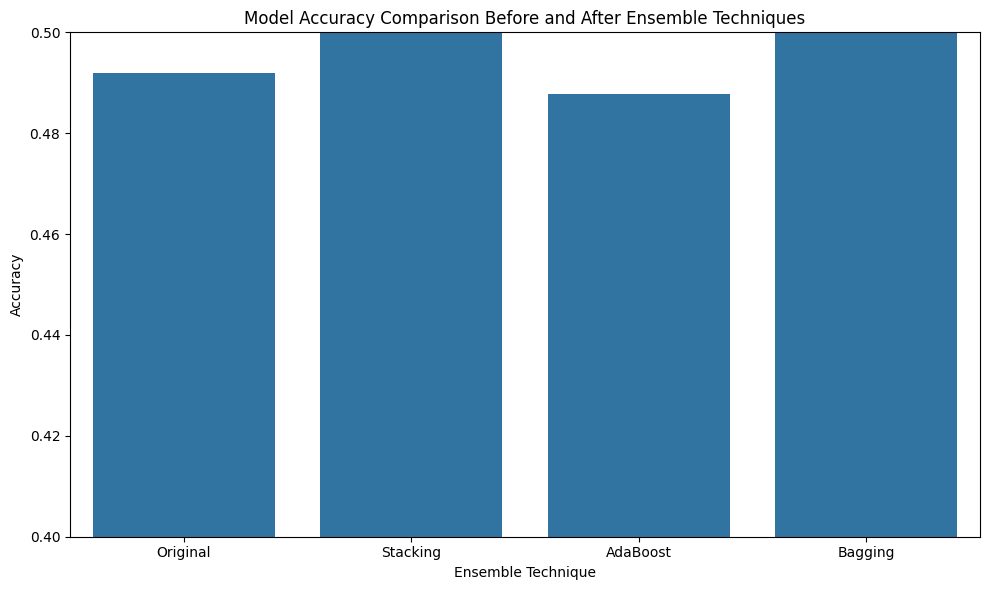

Summary of Model Accuracies:
Original: 0.4920
Stacking: 0.5029
AdaBoost: 0.4878
Bagging: 0.5021


In [178]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, StackingClassifier

highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]

highest_model.fit(X_selected_train, y_train)
predictions_highest = highest_model.predict(X_selected_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_model.fit(X_selected_train, y_train)
stacking_accuracy = stacking_model.score(X_selected_test, y_test)

adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators=100)
adaboost_model.fit(X_selected_train, y_train)
adaboost_accuracy = adaboost_model.score(X_selected_test, y_test)

bagging_model = BaggingClassifier(estimator=highest_model, n_estimators=100)
bagging_model.fit(X_selected_train, y_train)
bagging_accuracy = bagging_model.score(X_selected_test, y_test)

models_accuracy = {
    "Individual": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques')
plt.ylim(0.4, 0.5)
plt.tight_layout()
plt.show()

print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")

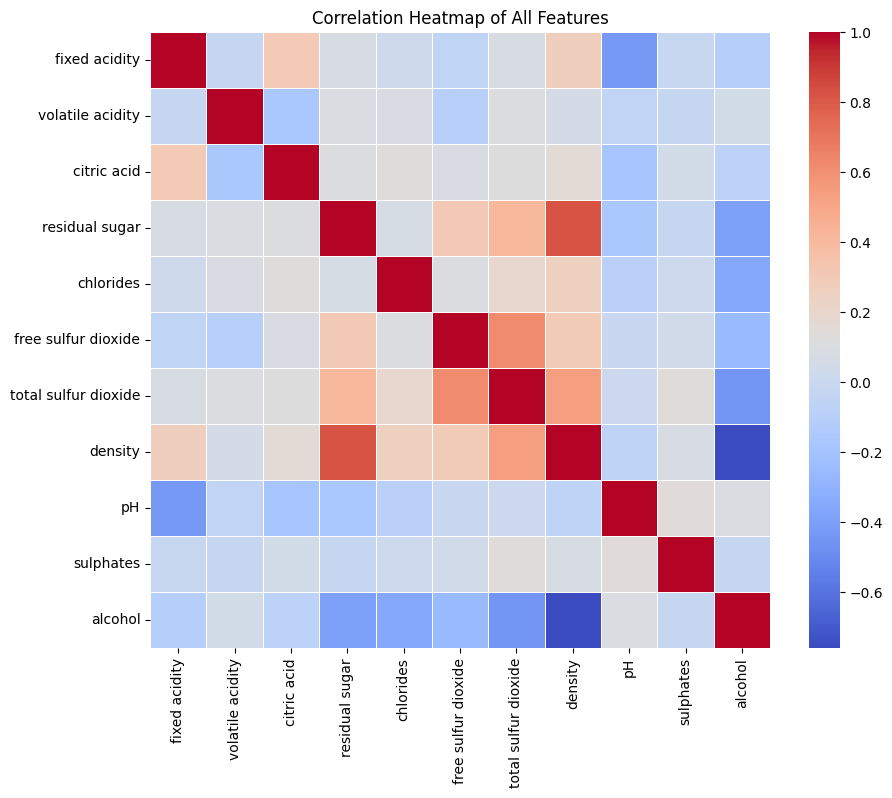